In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1) 
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
X , y = mnist['data'] , mnist['target']
X_train , X_test , y_train , y_test  = X[:60000] , X[60000:] , y[:60000] , y[60000:]
digits = np.reshape(X_train,(60000,28,28))
digits = digits/255   #normalizing 

In [ ]:
digits[0].shape

(28, 28)

In [ ]:
def plot(image):
  plt.imshow(image, cmap = 'gray')
  plt.show()

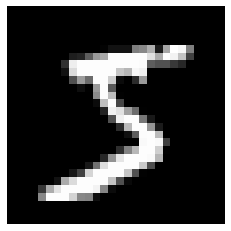

In [ ]:
plot(digits[0])

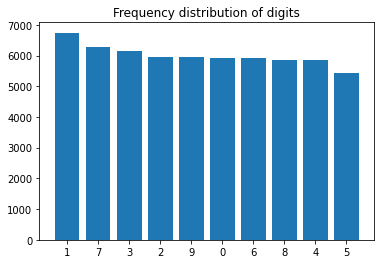

In [ ]:
frequency = pd.value_counts(y_train)
name = list(frequency.keys())
plt.title('Frequency distribution of digits')
plt.bar(name,frequency)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
ss = StandardScaler()
ss.fit_transform(X_train)
y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv = 3)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train,y_train_pred)


In [ ]:
precision = []
recall = []
row_sum = conf_mx.sum(axis = 1)
col_sum = conf_mx.sum(axis = 0)
for i in range(len(conf_mx[0])):
  precision.append(conf_mx[i][i]/col_sum[i])
  recall.append(conf_mx[i][i]/row_sum[i])
  print(str(i)+" : "+"Precision: "+str(precision[i])+" Recall: "+str(recall[i]))


0 : Precision: 0.975132625994695 Recall: 0.9930778321796387
1 : Precision: 0.9530916844349681 Recall: 0.9945120142390982
2 : Precision: 0.9837623078251857 Recall: 0.9558576703591809
3 : Precision: 0.9640699003756329 Recall: 0.9628119393247431
4 : Precision: 0.9781021897810219 Recall: 0.9633687093461143
5 : Precision: 0.958785648574057 Recall: 0.961261759822911
6 : Precision: 0.977101788400468 Recall: 0.9878337276106793
7 : Precision: 0.9597664878510571 Recall: 0.9709497206703911
8 : Precision: 0.984092155787164 Recall: 0.9198427619210391
9 : Precision: 0.9450513075140682 Recall: 0.9598251807026391





```
0 : Precision: 0.975132625994695 Recall: 0.9930778321796387
1 : Precision: 0.9530916844349681 Recall: 0.9945120142390982
2 : Precision: 0.9837623078251857 Recall: 0.9558576703591809
3 : Precision: 0.9640699003756329 Recall: 0.9628119393247431
4 : Precision: 0.9781021897810219 Recall: 0.9633687093461143
5 : Precision: 0.958785648574057 Recall: 0.961261759822911
6 : Precision: 0.977101788400468 Recall: 0.9878337276106793
7 : Precision: 0.9597664878510571 Recall: 0.9709497206703911
8 : Precision: 0.984092155787164 Recall: 0.9198427619210391
9 : Precision: 0.9450513075140682 Recall: 0.9598251807026391
```



In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit
# from sklearn.base import clone
# sss = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 42)
# sss.get_n_splits(X_train,y_train)
# for train_index , test_index in sss.split(X_train, y_train):
#   clone_clf = clone(knn_clf)
#   clone_clf.fit(X_train[train_index], y_train[train_index])
#   predict = clone_clf.predict(X_train[test_index])
#   print(sum(predict==y_train[test_index])/len(y_train[test_index]))





```
0.9684166666666667
0.9740833333333333
0.9704166666666667
```


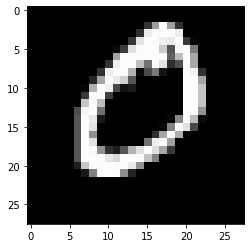

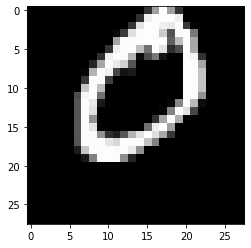

In [ ]:
# Data Augmentation

def BottomShift(IntArray):
  mat = IntArray.reshape(28,28)
  mat_t = np.zeros((28,28))
  for i in range(len(mat[0])-2):
    mat_t[:][i+2]= mat[:][i]
  return mat_t.reshape(IntArray.shape)
def TopShift(IntArray):
  mat = IntArray.reshape(28,28)
  mat_t = np.zeros((28,28))
  for i in range(1,len(mat[0])-2):
    mat_t[:][i]= mat[:][i+2]
  return mat_t.reshape(IntArray.shape)
def RightShift(IntArray):
  mat = IntArray.reshape(28,28)
  mat_t = np.zeros((28,28))
  for i in range(2,len(mat[0])):
    mat_t[i-2][:] = mat[i][:]
  return(mat_t.reshape(IntArray.shape))
def LeftShift(IntArray):
  mat = IntArray.reshape(28,28)
  mat_t = np.zeros((28,28))
  for i in range(0,len(mat[0])-2):
    mat_t[i][:] = mat[i+2][:]
  return(mat_t.reshape(IntArray.shape))


plot(digits[1])
plot(TopShift(digits[1]))


In [ ]:
ss.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
from sklearn.metrics import accuracy_score
knn_clf.fit(X_train,y_train)
pred = knn_clf.predict(X_test)

['7' '2' '1' ... '4' '5' '6'] ['7' '2' '1' ... '4' '5' '6']


In [ ]:
print(accuracy_score(y_test,pred))

0.9688
